In [2]:
from imdb import IMDb

imdb = IMDb()

In [15]:
# Complete with the title of the series you want to search
search = "Avatar: The Last Airbender"

shows = list(
    filter(
        lambda show: show["kind"] == "tv series",
        imdb.search_movie(title=search),
    )
)

if not shows:
    print("Not found")
    exit()

# Optionally, you can override the search with the imdbID of the show
code = shows[0].movieID
show = imdb.get_movie(code)

# Make sure is the correct one (check the link!)
print(f"{show['title']} ({show['year']})")
print(f"https://imdb.com/title/tt{code}")

Avatar: The Last Airbender (2005)
https://imdb.com/title/tt0417299


In [16]:
imdb.update(show, 'episodes')

number_of_seasons = show["number of seasons"]
number_of_episodes = show["number of episodes"]

print(f"Seasons: {number_of_seasons}")
print(f"Episodes: {number_of_episodes}")

Seasons: 3
Episodes: 62


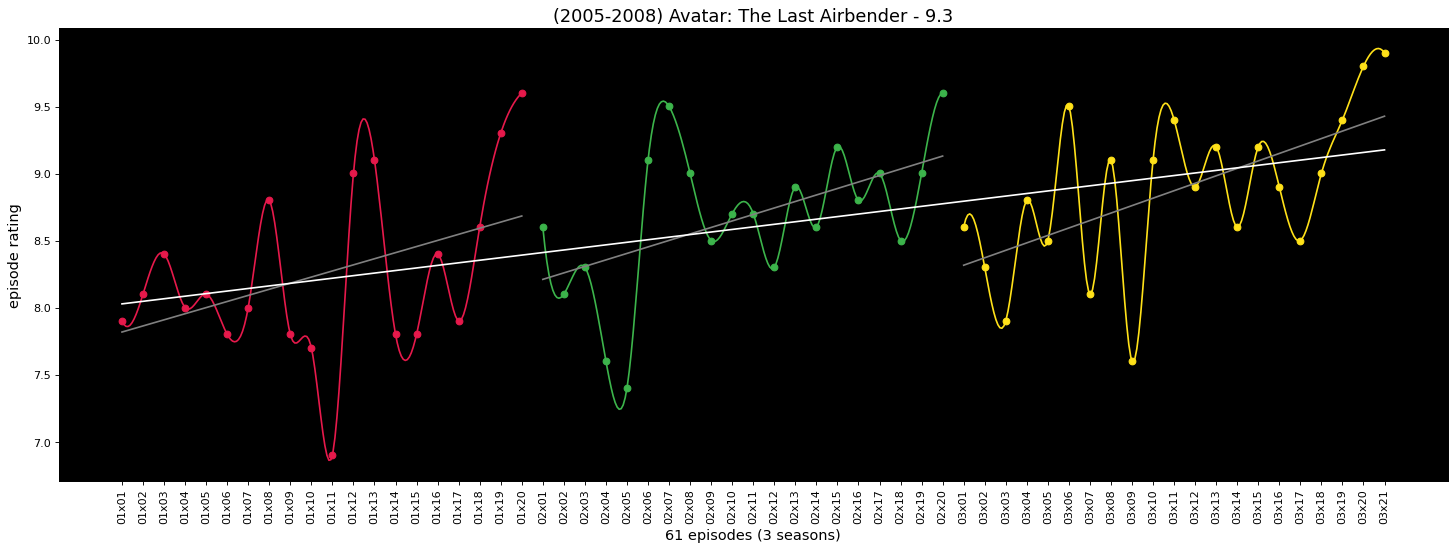

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

# CREATE FIGURE
fig = plt.figure(
    facecolor="white",
    figsize=(10 + 5 * max(number_of_episodes / 25, 1), 7.5),
    dpi=80,
)

# HIDE EXTRA XTICKS
plt.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

# SET TITLE
plt.title(
    f"({show['series years']}) {show['title']} - {show['rating']}",
    fontsize=16,
)

# SET UP AXIS
ax = plt.axes(facecolor="black")
ax.set_prop_cycle(color=[
    "#e6194b", "#3cb44b", "#ffe119", "#4363d8", "#f58231",
    "#911eb4", "#46f0f0", "#f032e6", "#bcf60c", "#fabebe",
    "#008080", "#e6beff", "#9a6324", "#fffac8", "#800000",
    "#aaffc3", "#808000", "#ffd8b1", "#000075",
])

# POPULATE
xlabels = []
gx, gy = [], []

index = 0

total_seasons = 0
total_episodes = 0

for season, season_episodes in show.data["episodes"].items():
    if season < 1:
        continue
    
    x, y = [], []
    episodes = []

    for episode in season_episodes.values():
        if episode["episode"] == 0:
            continue

        if not episode.data.get("rating"):
            continue
            
        xlabels.append(f"{episode['season']:02}x{episode['episode']:02}")

        x.append(index)
        gx.append(index)

        y.append(episode["rating"])
        gy.append(episode["rating"])

        episodes.append(episode)
        index += 1
    
    if episodes:
        total_seasons += 1
        total_episodes += len(episodes)
    else:
        continue

    z = np.polyfit(x, y, deg=1)
    p = np.poly1d(z)

    sp_x = np.linspace(x[-len(episodes)], x[-1], len(episodes) * 10)
    sp_y = interpolate.make_interp_spline(x, y)(sp_x)

    plt.plot(sp_x, sp_y)

    plt.scatter(x, y)
    plt.plot(x, p(x), color="gray")

# SET LABELS
if total_seasons == 1:
    x_label = f"{total_episodes} episodes (1 season)"
else:
    x_label = f"{total_episodes} episodes ({total_seasons} seasons)"

plt.xlabel(x_label, fontsize=13)
plt.ylabel("episode rating", fontsize=13)

# SET UP TICKS
plt.xticks(range(0, len(xlabels)), rotation=90)
ax.set_xticklabels(xlabels)

# PLOT
gz = np.polyfit(gx, gy, deg=1)
gp = np.poly1d(gz)

plt.plot(gx, gp(gx), color="white")

print()